## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mice = study_results.merge(mouse_metadata,how= "left", on="Mouse ID")
# Display the data table for preview
merge_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
merge_mice.loc[merge_mice["Mouse ID"]=="b128"] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
merge_mice["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_id = merge_mice.loc[merge_mice.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_mice.loc[merge_mice["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = merge_mice.loc[merge_mice["Mouse ID"]!="g989"]
clean_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

mouse_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

mouse_variance = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

mouse_sd = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

mouse_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({"mean":mouse_mean, "median":mouse_median, "variance":mouse_variance, "sd":mouse_sd, "sem":mouse_sem})



,mean,median,variance,sd,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug regime')

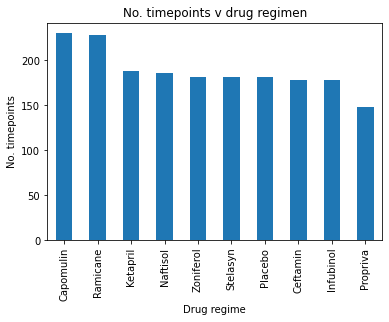

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = clean_mice["Drug Regimen"].value_counts()
bar_data.plot.bar()
plt.title("No. timepoints v drug regimen")
plt.ylabel("No. timepoints")
plt.xlabel("Drug regime")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

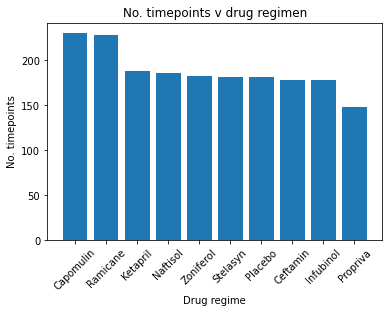

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(bar_data.index.values, bar_data.values)
plt.title("No. timepoints v drug regimen")
plt.ylabel("No. timepoints")
plt.xlabel("Drug regime")
plt.xticks(rotation=45)


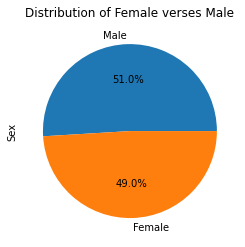

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
py_data = clean_mice["Sex"].value_counts()
py_data.plot.pie(autopct="%1.1f%%", title='Distribution of Female verses Male')


Text(0.5, 1.0, 'Distribution of Female verses Male')

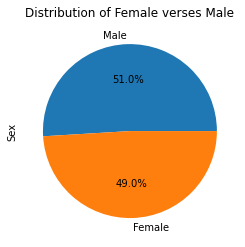

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(py_data.values, labels = py_data.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Female verses Male")


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = max_timepoint.merge(clean_mice, how="left", on = ["Mouse ID", "Timepoint"])
tumor_merge




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_merge.loc[tumor_merge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    
      # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower
    low_bound = lower - (1.5 * iqr)
    up_bound = upper + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol<low_bound)|(tumor_vol>up_bound)]
    print (f"{drug}: \n {outliers}")
    

Capomulin: 
 Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: 
 Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 
 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: 
 Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Final measured Tumor volume by Drug Regimen')

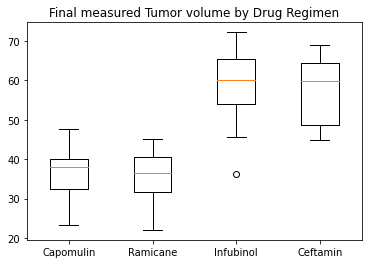

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.title('Final measured Tumor volume by Drug Regimen')

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = merge_mice.loc[merge_mice["Drug Regimen"] == "Capomulin"]
capo_df = capo_df.reset_index()
capo_df


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,226,j246,0,45.000000,0,Capomulin,Female,21,21
2,227,r554,0,45.000000,0,Capomulin,Female,8,17
3,228,s185,0,45.000000,0,Capomulin,Female,3,17
4,229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...,...
225,1854,s710,45,40.728578,1,Capomulin,Female,1,23
226,1859,j119,45,38.125164,1,Capomulin,Female,7,23
227,1878,i557,45,47.685963,1,Capomulin,Female,1,24
228,1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [25]:
capo_mice = capo_df.loc[capo_df["Mouse ID"] == "b128"]
capo_mice

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
47,472,b128,5,45.651331,0,Capomulin,Female,9,22
70,679,b128,10,43.270852,0,Capomulin,Female,9,22
76,719,b128,15,43.784893,0,Capomulin,Female,9,22
101,933,b128,20,42.731552,0,Capomulin,Female,9,22
139,1268,b128,25,43.262145,1,Capomulin,Female,9,22
157,1400,b128,30,40.605335,1,Capomulin,Female,9,22
177,1547,b128,35,37.967644,1,Capomulin,Female,9,22
188,1629,b128,40,38.379726,2,Capomulin,Female,9,22
209,1764,b128,45,38.982878,2,Capomulin,Female,9,22


Text(0.5, 1.0, 'Time Series of Tumor Volume for Capomulin')

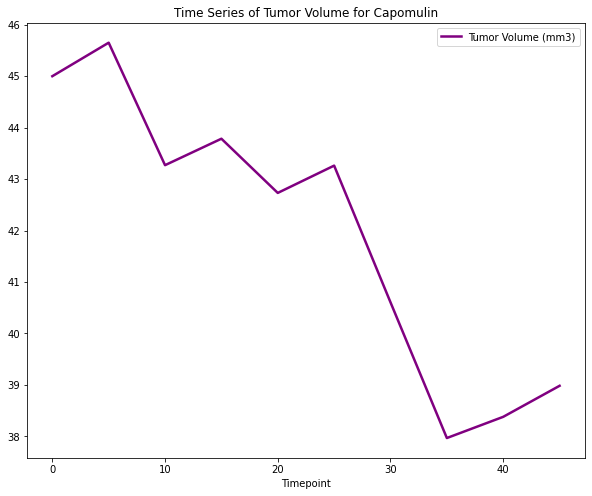

In [27]:
capo_mice = capo_mice.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_mice = capo_mice.reset_index(drop=True)
capo_mice.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="purple")

plt.title("Time Series of Tumor Volume for Capomulin")

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,226,j246,0,45.000000,0,Capomulin,Female,21,21
2,227,r554,0,45.000000,0,Capomulin,Female,8,17
3,228,s185,0,45.000000,0,Capomulin,Female,3,17
4,229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...,...
225,1854,s710,45,40.728578,1,Capomulin,Female,1,23
226,1859,j119,45,38.125164,1,Capomulin,Female,7,23
227,1878,i557,45,47.685963,1,Capomulin,Female,1,24
228,1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [29]:
capo_weight_tumor = capo_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capo_weight_tumor

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,j246,21,45.000000
2,r554,17,45.000000
3,s185,17,45.000000
4,b742,21,45.000000
...,...,...,...
225,s710,23,40.728578
226,j119,23,38.125164
227,i557,24,47.685963
228,r944,25,41.581521


In [30]:
capo_avg = pd.DataFrame(capo_weight_tumor.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capo_avg = capo_avg.rename(columns={"Tumor Volume (mm3)": "Tumor Average Volume"})
capo_avg

,Mouse ID,Weight (g),Tumor Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


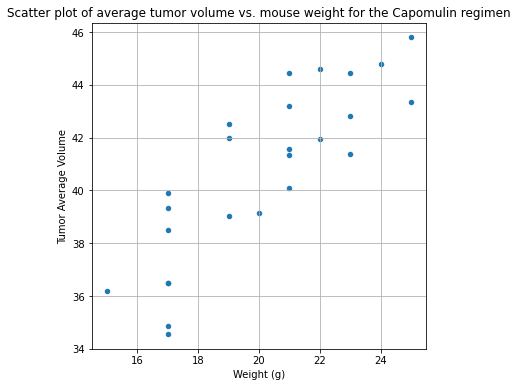

In [31]:
capo_avg = capo_avg.set_index("Mouse ID")
capo_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Average Volume", grid=True, figsize=(6,6), title="Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capo_avg.iloc[:,0]
avg_tumor_volume = capo_avg.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


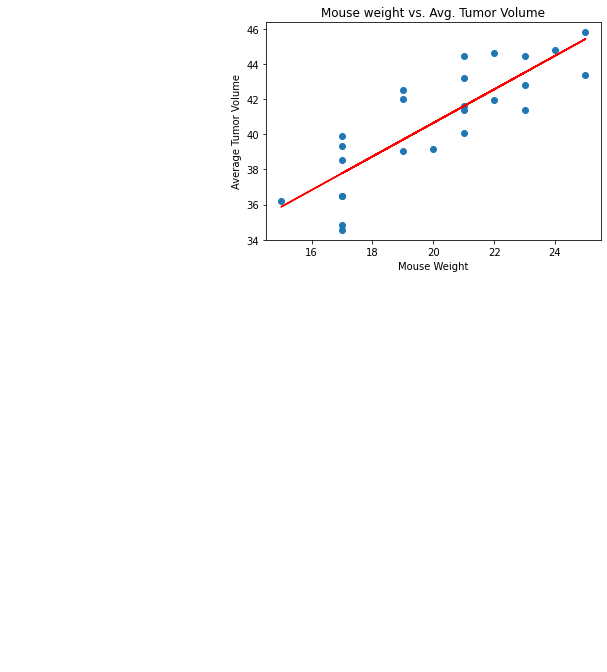

In [34]:
x_values = capo_avg['Weight (g)']
y_values = capo_avg['Tumor Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.show()